# Project: Investigate a Dataset (TMDB Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


## Questions Of Interest
### our dependant variable is rating(vote_average) we will focus our questions on factors affects the rating
<ul>
    <li>are there genres that get rated highly ?</li>
    <li>does the budget affect rating ?</li>
    <li>does the rvenue present quality(higher rating) ?</li>
    <li>who's the best rated director according to the data ?</li>
    <li>what's the highest rated movie ?</li>
    <li>Does runtime affect rating ?</li>
    <li>Does popularity affect rating ?</li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

# Helper Functions :

In [24]:
#some helper Functions :
#reading csv files as pandas dataframe : 
def read_data(file_name) :
    return  pd.read_csv(file_name)
#plotting distribution of a property in a dataframe :
def plt_hist(df, col, title = 'hist plot', xlabel = 'x_label', ylabel = 'frequency') :
    plt.hist(df[col])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);
#plotting scatterplot of 2 properties in a dataframe :
def plt_scatter(df, x, y, title = 'scatter plot', xlabel = 'x_label', ylabel = 'y_label') :
    ax = df.plot(x = x, y = y,title = title, kind = 'scatter', figsize = (8,8))
    ax.set(xlabel = xlabel, ylabel = ylabel);

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies_data = read_data('tmdb-movies.csv')
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#print column info and counts
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#checking number of duplicated rows
movies_data[movies_data.duplicated()]['id'].count()

1

## notes on data info 
<ul>
    <li>there are some missing values </li>
    <li>there are variables we won't use in our analysis(keywords , companies ,date...) </li>
    <li>movie duration should be categorical(using cut method) </li>
    <li>There's only one duplicate </li>
</ul>


### Data Cleaning (removing missing values, manipulating variables, removing duplicates)

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#dropping duplicates
movies_data.drop_duplicates(inplace = True)
movies_data[movies_data.duplicated()]['id'].count()

0

In [9]:
#dropping uninteresting columns -note that analysing the cast variable is too difficult in this set-
labels = ['imdb_id','budget','revenue','cast','homepage','tagline','overview','keywords','production_companies','release_date']
movies_data.drop(axis = 1, labels = labels, inplace = True)
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 11 columns):
id                10865 non-null int64
popularity        10865 non-null float64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1018.6+ KB


In [10]:
#drop missing data
movies_data.dropna(inplace = True)
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 11 columns):
id                10800 non-null int64
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null int64
genres            10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 1012.5+ KB


In [11]:
#categorize runtime to short , average and long movie using cut 
bins = [-1, 40, 99, 1000]
labels = ['short', 'average', 'long']
duration_category = pd.cut(movies_data['runtime'], bins = bins, labels = labels)
#make sure the length of it is the same as the data
duration_category.unique()

[long, average, short]
Categories (3, object): [short < average < long]

In [12]:
movies_data['runtime'] = duration_category
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 11 columns):
id                10800 non-null int64
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
runtime           10800 non-null category
genres            10800 non-null object
vote_count        10800 non-null int64
vote_average      10800 non-null float64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: category(1), float64(4), int64(3), object(3)
memory usage: 938.8+ KB


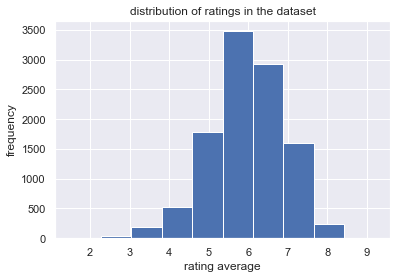

In [13]:
#having a look on the distribution of ratings
plt_hist(movies_data, 'vote_average', 'distribution of ratings in the dataset', 'rating average')

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (are there genres that get rated highly ?)

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#higher rated movies (>7)
high_rated = movies_data.query('vote_average >= 7')
high_rated['vote_average'].count()

1536

In [15]:
all_genres = high_rated['genres'].str.split(pat = '|', expand = True)
all_genres.head(1)

,0,1,2,3,4
1,Action,Adventure,Science Fiction,Thriller,None


In [16]:
#getting the counts of each rating
r0 = all_genres[0]
r1 = all_genres[1]
r2 = all_genres[2]
r3 = all_genres[3]
r4 = all_genres[4]
one_dim_genres = r0.append(r1.append(r2.append(r3.append(r4))))
one_dim_genres_df = one_dim_genres.value_counts()

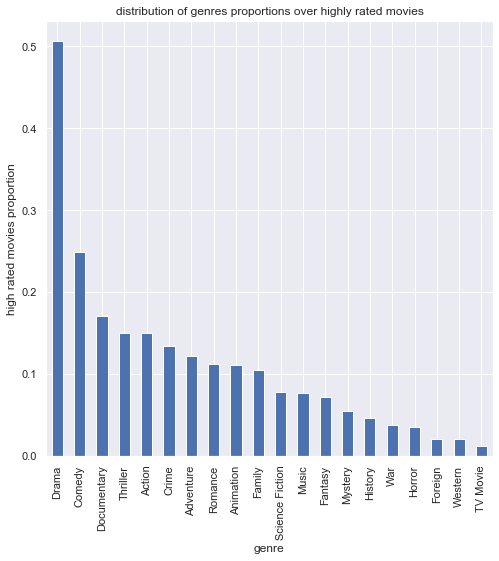

In [18]:
#plot the results
genres_proportion = one_dim_genres_df / 1536
ax = genres_proportion.plot(kind = 'bar', figsize = (8,8), title = 'distribution of genres proportions over highly rated movies')
ax.set(xlabel = 'genre', ylabel = 'high rated movies proportion');

<p>looks like more than half of the movies that are rated more than 7 contains the genre drama in its genres</p>

### Research Question 2  (does the budget or the revenue affect rating ?)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


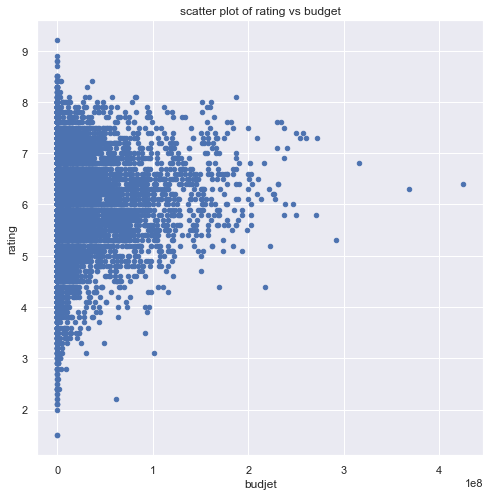

In [25]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#plotting a scatter plot of rating vs budget
plt_scatter(movies_data, 'budget_adj', 'vote_average', 'scatter plot of rating vs budget', 'budjet', 'rating')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


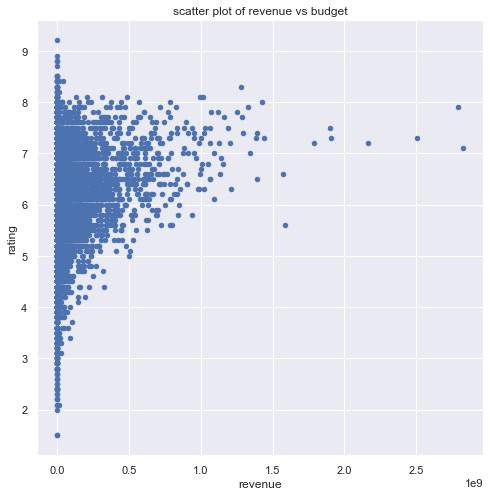

In [26]:
#plotting a scatter plot of rating vs revenue
plt_scatter(movies_data, 'revenue_adj', 'vote_average', 'scatter plot of revenue vs budget', 'revenue', 'rating')

<p>looks like there's a slight positive correlation between revenue and rating but it's not so strong</p>

### Highest rated director

In [27]:
movies_data.groupby(by = 'director').mean()['vote_average'].idxmax()

'Mark Cousins'

In [28]:
#to make sure 
movies_data.groupby(by = 'director').mean().query('director == "Mark Cousins"')['vote_average']

director
Mark Cousins    9.2
Name: vote_average, dtype: float64

<p>so Mark Cousins is the highest rated director</p>

### Highest rated movie

In [29]:
movies_data.query('index == vote_average.idxmax()')[['original_title','vote_average']]

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2


So the highest rated movie is : "The Story of Film: An Odyssey" with vote average of 9.2

### Studying runtime

In [30]:
#getting the proportion of highly rated movies in every category
long_movie_count = movies_data.query('runtime == "long"')['runtime'].count()
avg_movie_count = movies_data.query('runtime == "average"')['runtime'].count()
short_movie_count = movies_data.query('runtime == "short"')['runtime'].count()
#high_rated
long_movie_count_high = high_rated.query('runtime == "long"')['runtime'].count()
avg_movie_count_high = high_rated.query('runtime == "average"')['runtime'].count()
short_movie_count_high = high_rated.query('runtime == "short"')['runtime'].count()
#proportions
p_long = long_movie_count_high / long_movie_count
p_avg = avg_movie_count_high / avg_movie_count
p_short = short_movie_count_high / short_movie_count

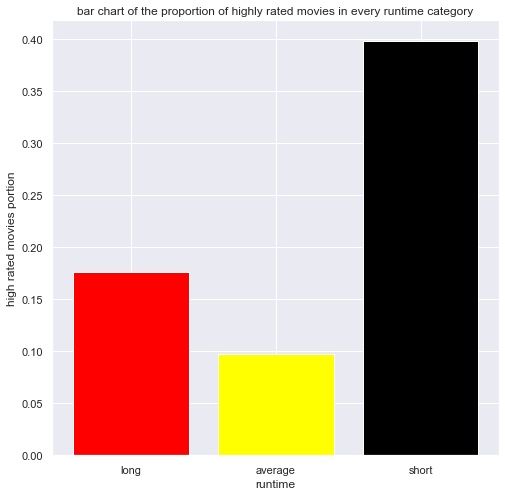

In [36]:
#plot the runtime data
plt.figure(figsize = (8,8))
plt.bar(['long', 'average', 'short'], [p_long, p_avg, p_short], color = ['red','yellow','black'])
plt.title('bar chart of the proportion of highly rated movies in every runtime category')
plt.xlabel('runtime')
plt.ylabel('high rated movies portion');

looks like movies < 40 mins has a noticeable advantage in the rating

### Studying popularity and its effect on ratings

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


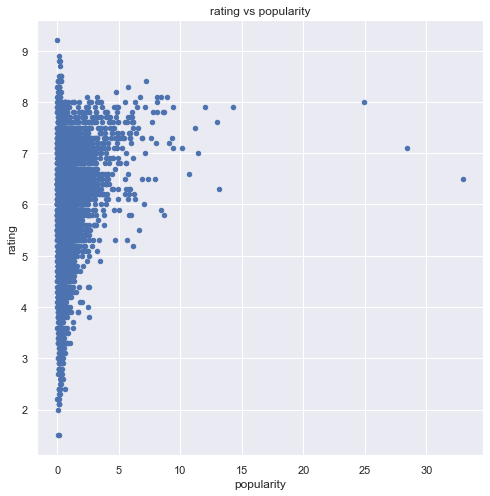

In [37]:
plt_scatter(movies_data, 'popularity', 'vote_average', 'rating vs popularity', 'popularity', 'rating')

slightly positively correlated but not that clear though

<a id='conclusions'></a>
## Conclusions

<ul>
    <li>ratings data are normally distributed around 6</li>
    <li>Mark Cousins is the highest rated director</li>
    <li>the highest rated movie is : "The Story of Film: An Odyssey" with vote average of 9.2</li>
    <li>Drama movies is the highest rated genre in the dataset followed by comedy</li>
    <li>there's a slight positive correlation between rating and popularity, budget and revenue but not that strong and needs more statistical testing</li>
    <li>movies with length less than 40 mins are more likely to get a higher rating with a proportion of more than 40% of their count</li>
</ul>